# AR(p)
# Autoregressive Model
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html'>ar_model.AR</a></strong><font color=black>(endog[, dates, freq, missing])</font>&nbsp;&nbsp;Autoregressive AR(p) model<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ARResults.html'>ar_model.ARResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Class to hold results from fitting an AR model</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/AR.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive models</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Autoregressive_model'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive model</font></div>

## Perform standard imports and load datasets
For this exercise we'll look at monthly U.S. population estimates in thousands from January 2011 to December 2018 (96 records, 8 years of data). Population includes resident population plus armed forces overseas. The monthly estimate is the average of estimates for the first of the month and the first of the following month.
Source: https://fred.stlouisfed.org/series/POPTHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR,ARResults

In [2]:
# Loading the data,

df= pd.read_csv('uspopulation.csv', index_col='DATE', parse_dates=True)
df.index.freq='MS'

In [3]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


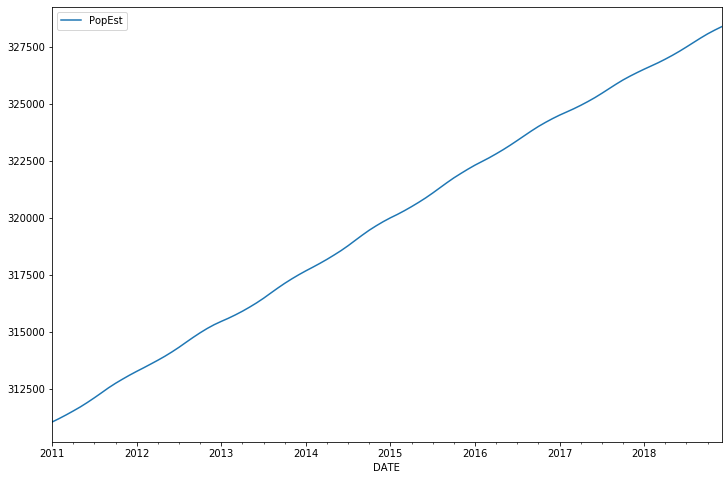

In [4]:
df.plot(figsize=(12,8))

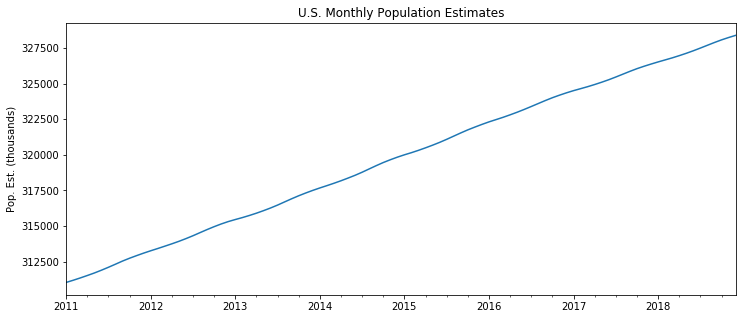

In [5]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='' # we don't really need a label here

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Split the data into train/test sets
The goal in this section is to:
* Split known data into a training set of records on which to fit the model
* Use the remaining records for testing, to evaluate the model
* Fit the model again on the <em>full</em> set of records
* Predict a future set of values using the model

As a general rule you should set the length of your test set equal to your intended forecast size. That is, for a monthly dataset you might want to forecast out one more year. Therefore your test set should be one year long.

<div class="alert alert-info"><strong>NOTE: </strong>For many training and testing applications we would use the <tt>train_test_split()</tt> function available from Python's <a href='https://scikit-learn.org/stable/'>scikit-learn</a> library. This won't work here as <tt>train_test_split()</tt> takes <em>random samples</em> of data from the population.</div>

In [6]:
len(df)

96

In [7]:
96-12

84

In [8]:
# Set one year for testing
train = df.iloc[:84]
test = df.iloc[84:]

In [9]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

## Fit an AR(1) Model

In [10]:
model= AR(train['PopEst'])

In [11]:
# Fitting the model

Ar1fit= model.fit(maxlag=1)

In [12]:
# AIC--> Alkaike Infirmation Criterion... Used for evaluating the model
Ar1fit.aic

6.410771237031904

In [13]:
# this tells the number of lag or the order of k.
Ar1fit.k_ar

1

In [14]:
# Grab the consatnat and coeff value
Ar1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [15]:
# Genral Format for the Prediction
start=len(train)
end= len(train)+ len(test) -1

In [16]:
start

84

In [17]:
end

95

In [18]:
Ar1fit.predict(start=start,end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [19]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [20]:
# Compare of predicted values to real known test vales
predictions= Ar1fit.predict(start=start,end=end)

In [21]:
predictions= predictions.rename('AR(1) Predictions')

In [22]:
predictions

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

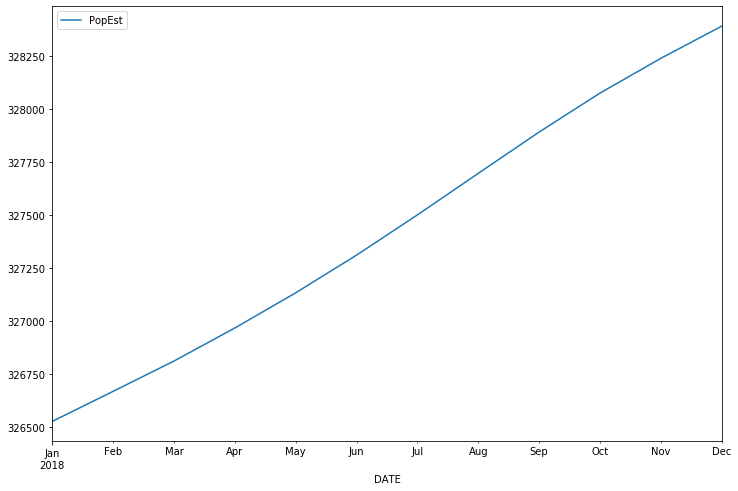

In [23]:
test.plot(figsize=(12,8),legend=True)

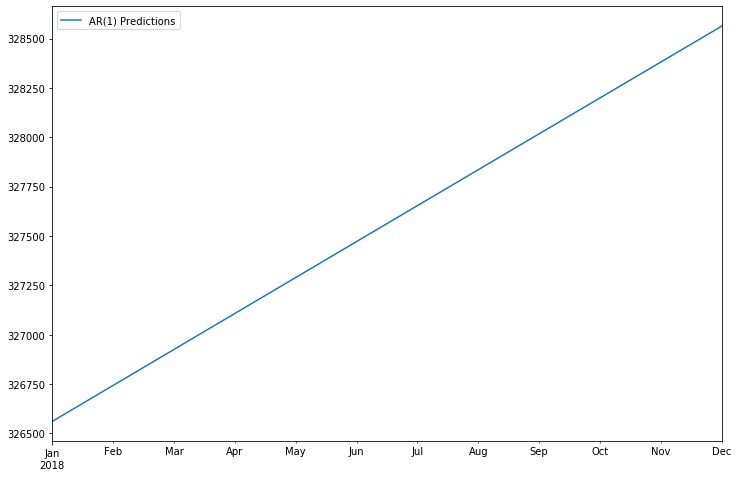

In [24]:
predictions.plot(figsize=(12,8),legend=True)

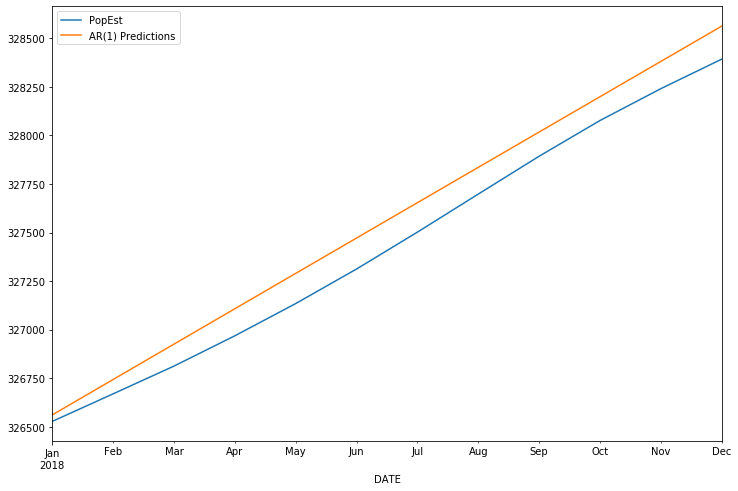

In [75]:
test.plot(figsize=(12,8),legend=True)
predictions.plot(figsize=(12,8),legend=True)

## Fit an AR(2) Model

In [71]:
model= AR(train['PopEst'])

In [72]:
# Fitting the model
Ar2fit= model.fit(maxlag=2)

In [55]:
# AIC--> Alkaike Infirmation Criterion... Used for evaluating the model
Ar2fit.aic

5.079311773556873

In [56]:
# AIC--> Alkaike Infirmation Criterion... Used for evaluating the model
Ar2fit.k_ar

2

In [57]:
# AIC--> Alkaike Infirmation Criterion... Used for evaluating the model
Ar2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [58]:
Ar2fit.predict(start=start,end=end)

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882249
2018-04-01    327015.944947
2018-05-01    327177.719497
2018-06-01    327340.045893
2018-07-01    327502.787327
2018-08-01    327665.826842
2018-09-01    327829.064475
2018-10-01    327992.414803
2018-11-01    328155.804852
2018-12-01    328319.172299
Freq: MS, dtype: float64

In [59]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [61]:
# Compare of predicted values to real known test vales
predictions2 = Ar2fit.predict(start=start,end=end)

In [62]:
predictions2= predictions.rename('AR(2) Predictions')

In [63]:
predictions2

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(2) Predictions, dtype: float64

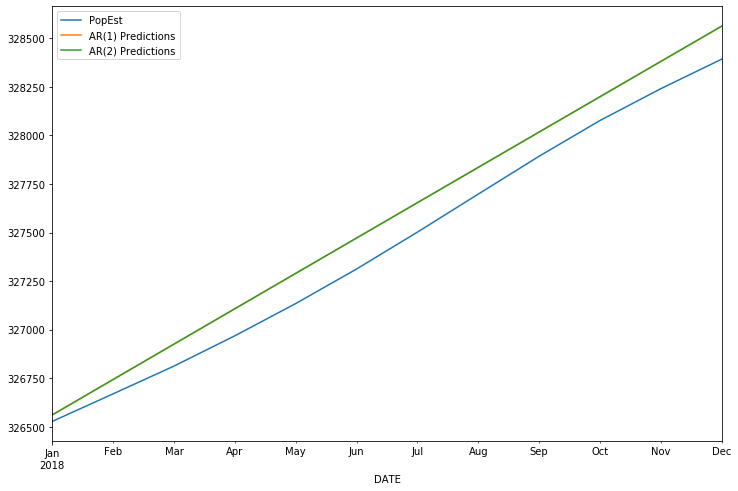

In [77]:
test.plot(figsize=(12,8),legend=True)
predictions.plot(figsize=(10,8),legend=True)
predictions2.plot(figsize=(12,8),legend=True)

## Fit an AR(p) model where statsmodels chooses p
This time we'll omit the <tt>maxlag</tt> argument in <tt>AR.fit()</tt> and let statsmodels choose a p-value for us.

In [65]:
models = AR(train['PopEst'])

In [66]:
ARfit = models.fit(ic='t-stat')

In [67]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [68]:
predictions8= ARfit.predict(start,end)
predictions8 = predictions8.rename('Ar(8) Predictions')

## Evaluate the Model
It helps to have a means of comparison between two or more models. One common method is to compute the Mean Squared Error (MSE), available from scikit-learn.

In [73]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(8)']
preds = [predictions, predictions2, predictions8]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error}')

AR(1) Error: 17449.714242014332
AR(2) Error: 17449.714242014332
AR(8) Error: 186.96945419794508


## Plotting

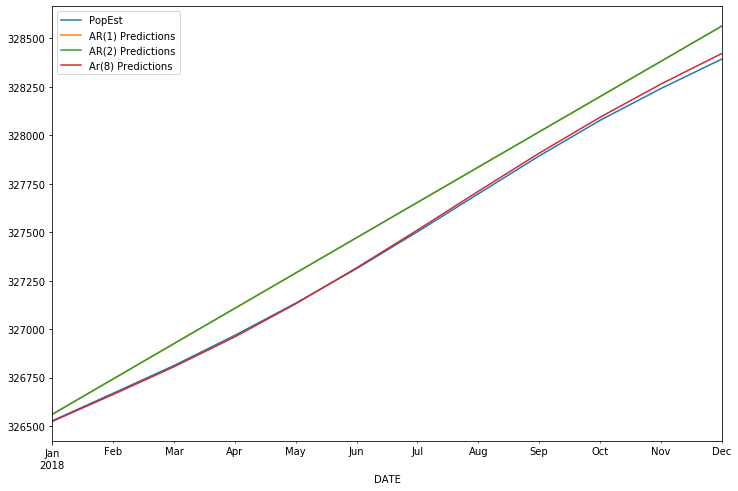

In [74]:
test.plot(figsize=(12,8),legend=True)
predictions.plot(figsize=(12,8),legend=True)
predictions2.plot(figsize=(12,8),legend=True)
predictions8.plot(figsize=(12,8),legend=True)

We see right away how well AR(8) outperformed the other two models.

Another method is the <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> (AIC), which does a better job of evaluating models by avoiding overfitting.<br>
Fortunately this is available directly from the fit model object.

In [82]:
modls = [Ar1fit,Ar2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 6.4108
AR(2) AIC: 5.0793
AR(8) AIC: 3.5878


# Forecasting

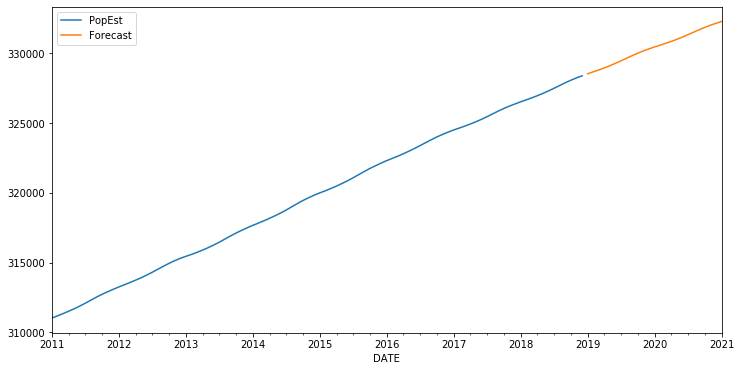

In [87]:
# First, retrain the model on the full dataset
model = AR(df['PopEst'])

# Next, fit the model
ARfit = model.fit()

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+24, dynamic=False).rename('Forecast')

# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));